In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing 

In [2]:
df=pd.read_csv('Traffic.csv')

In [3]:
df.head()

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
0,12:00:00 AM,10,Tuesday,31,0,4,4,39,low
1,12:15:00 AM,10,Tuesday,49,0,3,3,55,low
2,12:30:00 AM,10,Tuesday,46,0,3,6,55,low
3,12:45:00 AM,10,Tuesday,51,0,2,5,58,low
4,1:00:00 AM,10,Tuesday,57,6,15,16,94,normal


In [4]:
df.shape

(2976, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2976 entries, 0 to 2975
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Time               2976 non-null   object
 1   Date               2976 non-null   int64 
 2   Day of the week    2976 non-null   object
 3   CarCount           2976 non-null   int64 
 4   BikeCount          2976 non-null   int64 
 5   BusCount           2976 non-null   int64 
 6   TruckCount         2976 non-null   int64 
 7   Total              2976 non-null   int64 
 8   Traffic Situation  2976 non-null   object
dtypes: int64(6), object(3)
memory usage: 209.4+ KB


In [6]:
df.isnull().sum()

Time                 0
Date                 0
Day of the week      0
CarCount             0
BikeCount            0
BusCount             0
TruckCount           0
Total                0
Traffic Situation    0
dtype: int64

<Axes: xlabel='Day of the week', ylabel='Count'>

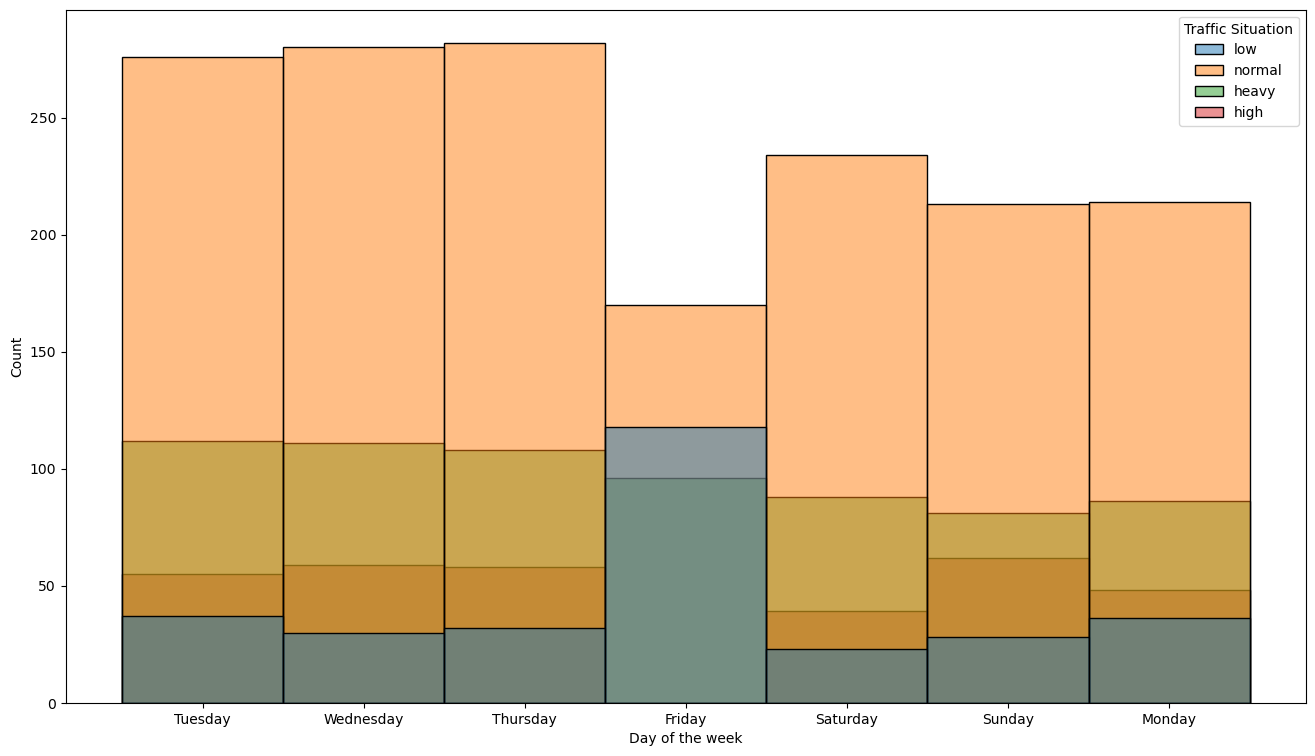

In [7]:
plt.figure(figsize=(16,9))
sns.histplot(data=df, x="Day of the week", hue="Traffic Situation")

<Axes: xlabel='Total', ylabel='Count'>

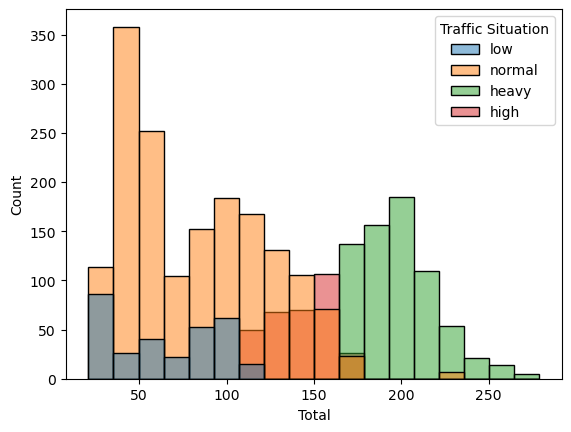

In [8]:
sns.histplot(data=df, x="Total", hue="Traffic Situation")

In [9]:
df.columns

Index(['Time', 'Date', 'Day of the week', 'CarCount', 'BikeCount', 'BusCount',
       'TruckCount', 'Total', 'Traffic Situation'],
      dtype='object')

In [10]:
df['Total'].value_counts()

46     37
42     36
53     31
55     30
49     30
       ..
21      1
278     1
245     1
244     1
22      1
Name: Total, Length: 239, dtype: int64

In [11]:
# Distinct Classes in Target variable
df['Traffic Situation'].value_counts()

normal    1669
heavy      682
high       321
low        304
Name: Traffic Situation, dtype: int64

In [12]:
#Removing AM and PM from Time column
#df['Time'] = df['Time'].str.replace(' AM', '').str.replace(' PM', '')
df['Temp'] = df['Time'].apply(lambda x: x.split(' ')[1]) #Temporary column for AM/PM
df['AM/PM'] = df['Temp'].replace({'AM':0,'PM':1})
df=df.drop(['Temp'],axis=1)

In [13]:
#This time format cannot be used in Algorithm
#Converting with respect to hours and minutes

df['hour'] = pd.to_datetime(df['Time']).dt.hour
df['minute'] = pd.to_datetime(df['Time']).dt.minute

#Removing Time column
df = df.drop(['Time'],axis = 1)


In [14]:
#removing carcount bikecount and truckcount
df=df.drop(columns= ['CarCount', 'BikeCount', 'TruckCount','BusCount'], axis=1)
df

,Date,Day of the week,Total,Traffic Situation,AM/PM,hour,minute
0,10,Tuesday,39,low,0,0,0
1,10,Tuesday,55,low,0,0,15
2,10,Tuesday,55,low,0,0,30
3,10,Tuesday,58,low,0,0,45
4,10,Tuesday,94,normal,0,1,0
...,...,...,...,...,...,...,...
2971,9,Thursday,56,normal,1,22,45
2972,9,Thursday,42,normal,1,23,0
2973,9,Thursday,45,normal,1,23,15
2974,9,Thursday,48,normal,1,23,30


In [15]:
df['Day of the week'].value_counts()

Tuesday      480
Wednesday    480
Thursday     480
Friday       384
Saturday     384
Sunday       384
Monday       384
Name: Day of the week, dtype: int64

In [16]:
df['Traffic Situation'].value_counts()

normal    1669
heavy      682
high       321
low        304
Name: Traffic Situation, dtype: int64

In [17]:
#Transforming the day of the week and Traffic into numeric values 

#label_encoder = preprocessing.LabelEncoder()
#df['Day of the week']= label_encoder.fit_transform(df['Day of the week'])
#df['Traffic Situation']= label_encoder.fit_transform(df['Traffic Situation'])
df['Traffic Situation'] = df['Traffic Situation'].replace({'low':0, 'normal':1, 
                                                              'heavy':2, 'high':3})

df['Day of the week'] = df['Day of the week'].replace({'Monday':1,'Tuesday':2,
                                                          'Wednesday':3,'Thursday':4,
                                                          'Friday':5,'Saturday':6,
                                                          'Sunday':7})

In [18]:
df['Day of the week'].value_counts()

2    480
3    480
4    480
5    384
6    384
7    384
1    384
Name: Day of the week, dtype: int64

In [19]:
df['Traffic Situation'].value_counts()

1    1669
2     682
3     321
0     304
Name: Traffic Situation, dtype: int64

In [20]:
X = df.drop(['Traffic Situation'],axis =1)
Y = df['Traffic Situation']

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, random_state=13)

In [23]:
X_test.head()

,Date,Day of the week,Total,AM/PM,hour,minute
1373,24,2,229,0,7,15
1756,28,6,160,0,7,0
2796,8,3,40,0,3,0
2060,31,2,87,0,11,0
1492,25,3,89,1,13,0


In [24]:
y_test.head()

1373    2
1756    3
2796    1
2060    1
1492    1
Name: Traffic Situation, dtype: int64

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [26]:
RForest_clf = RandomForestClassifier(n_estimators = 100)
RForest_clf.fit(X_train, y_train)
y_pred = RForest_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)*100
print(f'Accuracy: {accuracy}')

Accuracy: 84.78747203579418


In [27]:
y_pred[:5]

array([2, 1, 1, 1, 1], dtype=int64)

In [28]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 22,  21,   0,   0],
       [ 10, 201,   2,  19],
       [  0,   0, 119,   0],
       [  0,  16,   0,  37]], dtype=int64)

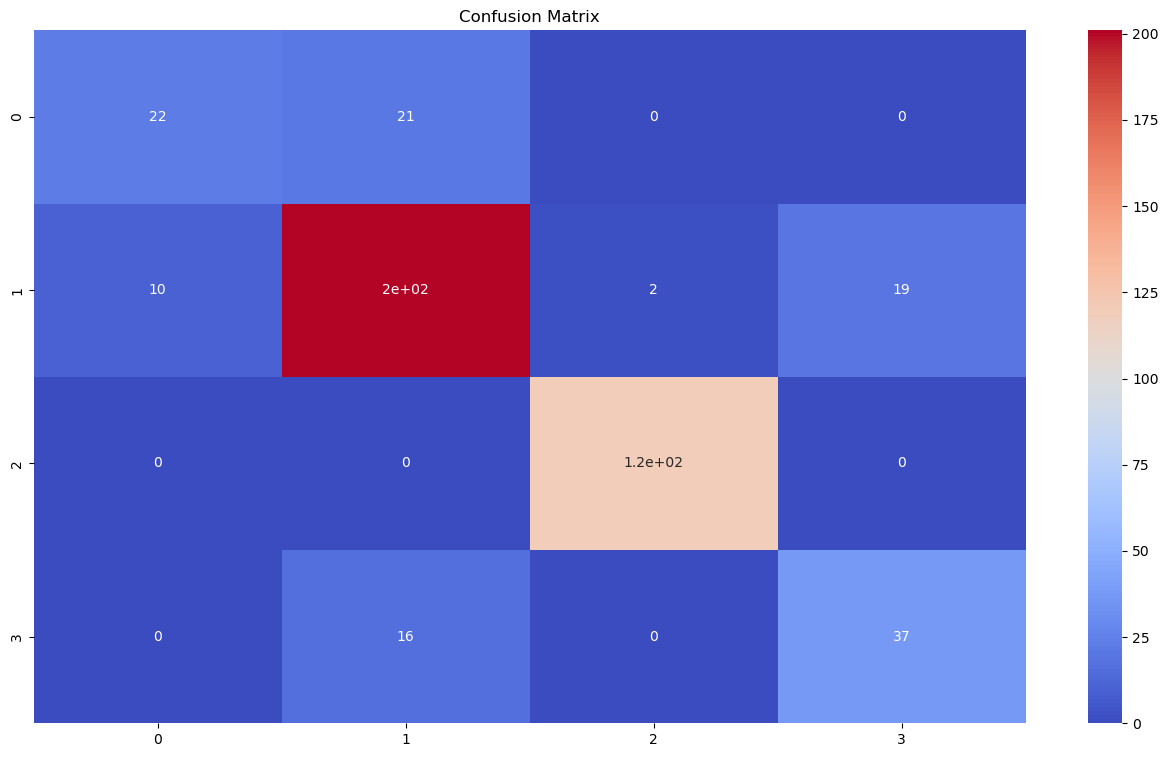

In [29]:
plt.figure(figsize=(16,9))  # Adjust the figure size as needed
sns.heatmap(cm, annot=True, cmap='coolwarm')
plt.title('Confusion Matrix')
plt.show()

In [30]:
import joblib

In [31]:
joblib.dump(RForest_clf,open('traffic_prediction.jb','wb'))

In [32]:
model=joblib.load(open('traffic_prediction.jb','rb'))

In [33]:
import gradio as gr
import joblib

def predict_expenses(
    Date,Day_of_the_week,Total,
    hour,am_pm,minute
    ):
    
    model=joblib.load(open('traffic_prediction.jb','rb'))
    
    # Create dict array from parameters
    data={
        'Date':[Date],
        'Day of the week':[Day_of_the_week],
        'Total':[Total],
        'AM/PM':[am_pm],
        'hour':[hour],
        'minute':[minute],
    }
    
    xinp=pd.DataFrame(data)
    
    situation=model.predict(xinp)
    if situation[0]==0:
        return 'LOW TRAFFIC'
    elif situation[0]==1:
        return 'NORMAL TRAFFIC'
    elif situation[0]==2:
        return 'HEAVY TRAFFIC'
    else:
        return 'HIGH TRAFFIC'


ui=gr.Interface(fn=predict_expenses,
               
               inputs=[
        gr.Textbox(placeholder="DATE",label="DATE"),
        gr.Textbox(placeholder="PLEASE ENTER IN NUMBERS (0-6)",label="WEEK DAY"),
        gr.Textbox(placeholder="total vehicles",label="TOTAL VEHICLES"),
        gr.Dropdown([0,1],label="AM:0 AND PM:1"),
        gr.Textbox(placeholder="PLEASE ENTER IN 24 HOURS FORMAT",label="HOURS"),
        gr.Textbox(placeholder="minutes",label="MINUTES"),

    ],
    
    title="TRAFFIC PREDICTOR",

    outputs="text",
    examples=[[24,5,229,0,7,15],[12,1,90,1,11,30]],)

ui.launch(share=True)
    

Running on local URL:  http://127.0.0.1:7860

Could not create share link. Please check your internet connection or our status page: https://status.gradio.app.
